Modeling with Scikit-learn

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
dat = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")

Target and Predictors

In [3]:
y = dat['SalePrice']
X = dat[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]

Model specifications

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

Test/training split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Model fitting and Metrics

In [60]:
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)

In [61]:
# This tells us what coefficients are in linear regression
# Dont have same ability to examine "model fit" for dt and knn
lr_fit.coef_

array([    69.12460703, -11268.71392189,  -8109.92569735,   8109.92569735])

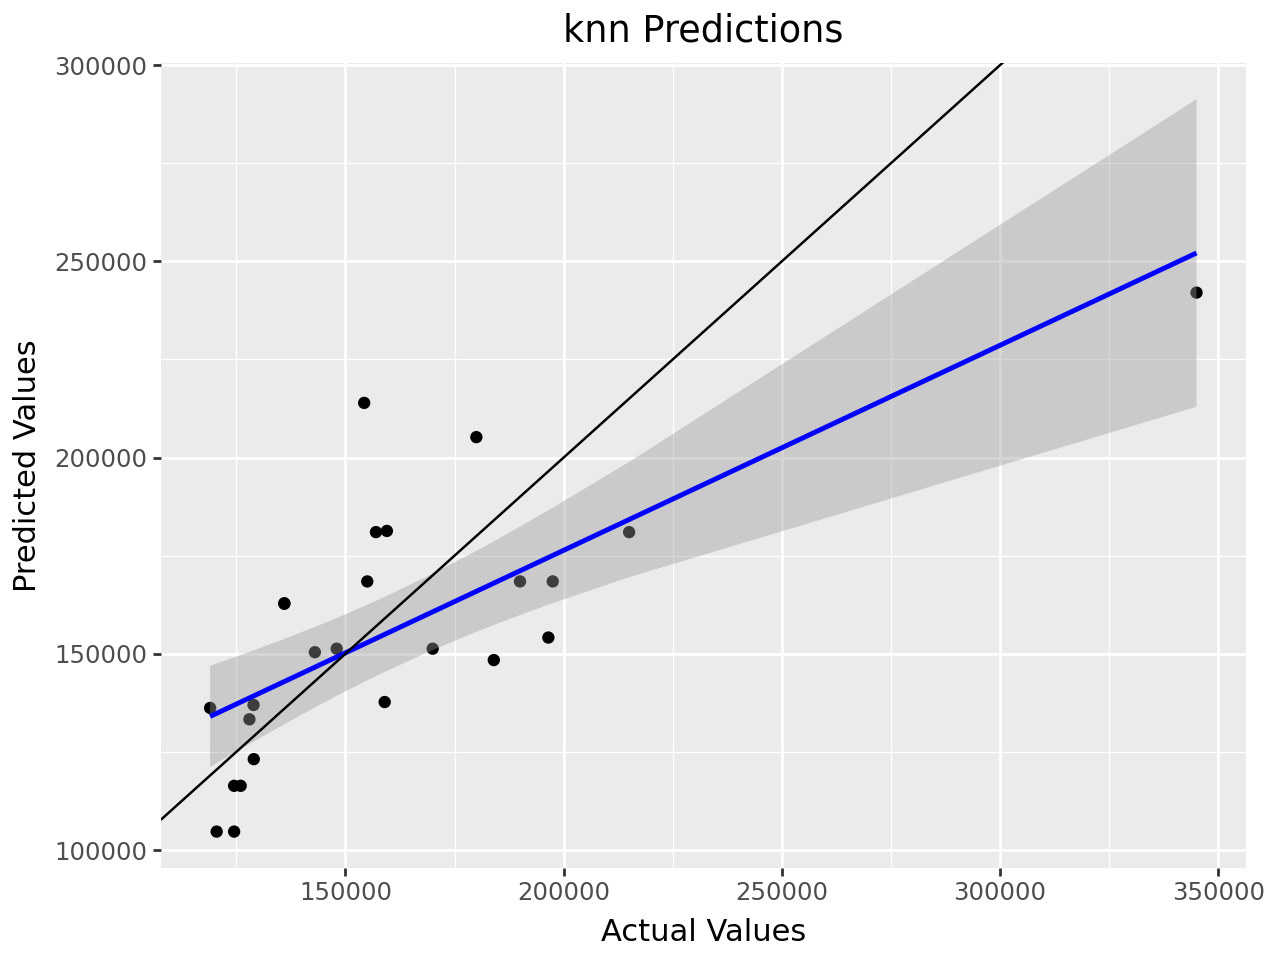

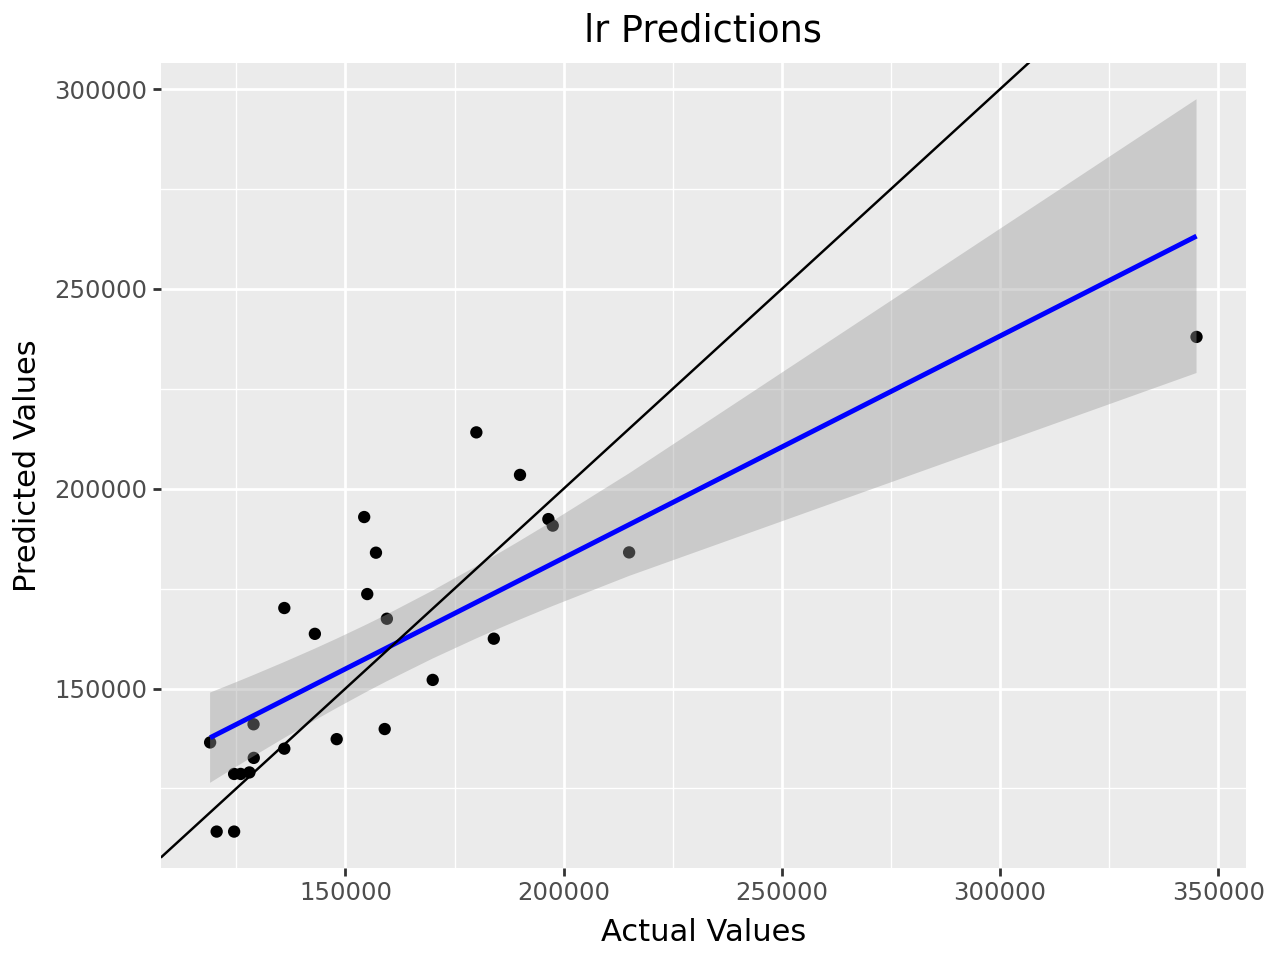

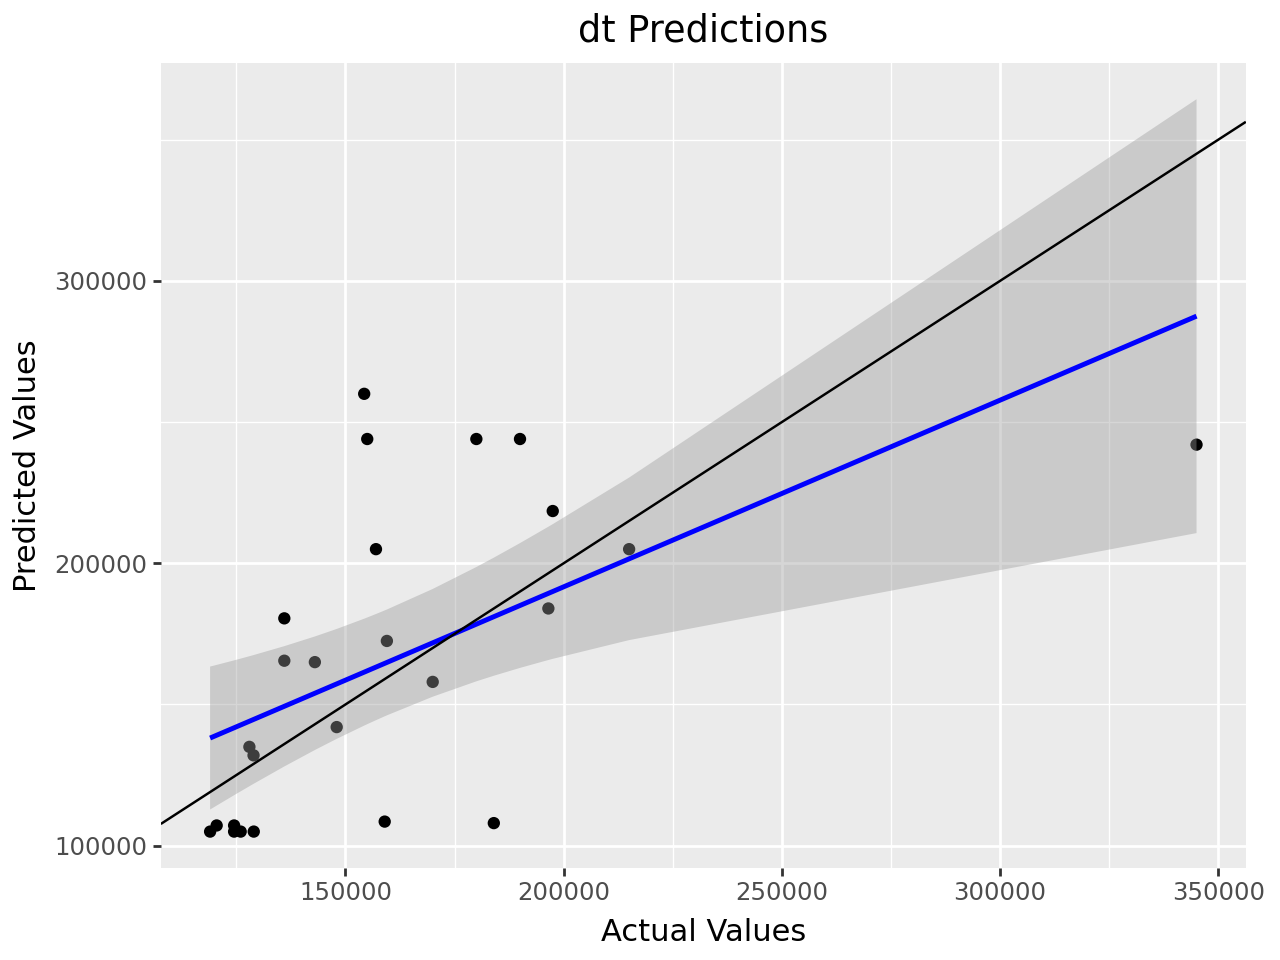

In [72]:
from plotnine import * # Import plotnine functionalities

# Next, we use the fitted models to get predicted values for the test data.
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)

# Create a dataframe for plotting
import pandas as pd
df = pd.DataFrame({'y_test': y_test,
                   'y_pred_knn': y_pred_knn,
                   'y_pred_lr': y_pred_lr,
                   'y_pred_dt': y_pred_dt})

# Looking at the plots, want one whos best fit line resembles 45 degree line
# Plot for knn
(ggplot(df, aes(x='y_test', y='y_pred_knn')) +
 geom_point() +
 geom_smooth(method='lm', se=True, color='blue') +
 geom_abline(intercept=0, slope=1, color='black') +
 labs(title='knn Predictions', x='Actual Values', y='Predicted Values')).show()

# Plot for lr
(ggplot(df, aes(x='y_test', y='y_pred_lr')) +
 geom_point() +
 geom_smooth(method='lm', se=True, color='blue') +
 geom_abline(intercept=0, slope=1, color='black') +
 labs(title='lr Predictions', x='Actual Values', y='Predicted Values')).show()

# Plot for dt
(ggplot(df, aes(x='y_test', y='y_pred_dt')) +
 geom_point() +
 geom_smooth(method='lm', se=True, color='blue') +
 geom_abline(intercept=0, slope=1, color='black') +
 labs(title='dt Predictions', x='Actual Values', y='Predicted Values')).show()

In [63]:
from sklearn.metrics import mean_squared_error

e1 = mean_squared_error(y_test, y_pred_knn)
e2 = mean_squared_error(y_test, y_pred_lr)
e3 = mean_squared_error(y_test, y_pred_dt)

print(e1, e2, e3)
min(e1, e2, e3)

1003307198.2208 820941315.6319922 2154057126.648889


820941315.6319922

In [64]:
# Choose model with smallest error
final_model = lr.fit(X, y)
final_model.coef_

array([    74.37717581, -13083.50151923,  -7484.17760684,   7484.17760684])